In [54]:
import os
import shutil
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset
import cv2
from torch.utils.data import DataLoader
import numpy as np
import copy

In [13]:
from sklearn import metrics
def metric(y_test, y_pred):
    matrix = metrics.confusion_matrix(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    return matrix,accuracy,precision,recall,f1

In [14]:
def move_files(abs_dirname, train_dir, test_dir):
    """Move files into subdirectories."""

    files = [os.path.join(abs_dirname, f) for f in os.listdir(abs_dirname)]

    i = 0
    curr_subdir = None
    files.sort()

    for f in files:
        # create new subdir if necessary
        if i == 0:
            curr_subdir = train_dir
        
        if i == 11025:
            curr_subdir = test_dir

        # move file to current dir
        f_base = os.path.basename(f)
        shutil.copy(f, os.path.join(curr_subdir, f_base))
        i += 1
        if(i%100 == 0):
            print(i)

In [15]:
abs_dirname = "/Users/parth/ML/Project/cell_images/Parasitized/"
train_dir = "/Users/parth/ML/Project/project/dataset/train/parasite"
test_dir = "/Users/parth/ML/Project/project/dataset/test/parasite"

In [16]:
move_files(abs_dirname, train_dir, test_dir)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700


In [17]:
abs_dirname = "/Users/parth/ML/Project/cell_images/Uninfected/"
train_dir = "/Users/parth/ML/Project/project/dataset/train/uninfected"
test_dir = "/Users/parth/ML/Project/project/dataset/test/uninfected"

In [18]:
move_files(abs_dirname, train_dir, test_dir)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700


In [19]:
import pandas as pd
train_df = pd.DataFrame(columns = ["path", "label"])
test_df = pd.DataFrame(columns = ["path", "label"])

abs_dirname  = "/Users/parth/ML/Project/project/dataset/train/parasite"
files = [os.path.join(abs_dirname, f) for f in os.listdir(abs_dirname)]
for f in files:
    f_base = os.path.basename(f)
    if f_base.endswith('.png'):
        train_df = train_df.append({'path': f_base, "label": 1}, ignore_index=True)

abs_dirname  = "/Users/parth/ML/Project/project/dataset/train/uninfected"
files = [os.path.join(abs_dirname, f) for f in os.listdir(abs_dirname)]
for f in files:
    f_base = os.path.basename(f)
    if f_base.endswith('.png'):
        train_df = train_df.append({'path': f_base, "label": 0}, ignore_index=True)
    
train_df.to_csv("/Users/parth/ML/Project/project/dataset/train.csv", index = False)


abs_dirname  = "/Users/parth/ML/Project/project/dataset/test/parasite"
files = [os.path.join(abs_dirname, f) for f in os.listdir(abs_dirname)]
for f in files:
    f_base = os.path.basename(f)
    if f_base.endswith('.png'):
        test_df = test_df.append({'path': f_base, "label": 1}, ignore_index=True)
    
abs_dirname  = "/Users/parth/ML/Project/project/dataset/test/uninfected"
files = [os.path.join(abs_dirname, f) for f in os.listdir(abs_dirname)]
for f in files:
    f_base = os.path.basename(f)
    if f_base.endswith('.png'):
        test_df = test_df.append({'path': f_base, "label": 0}, ignore_index=True)
    
test_df.to_csv("/Users/parth/ML/Project/project/dataset/test.csv", index = False)

In [20]:
test_df

,path,label
0,C91P52ThinF_IMG_20150821_123116_cell_189.png,1
1,C84P45ThinF_IMG_20150818_101226_cell_98.png,1
2,C85P46ThinF_IMG_20150820_105154_cell_221.png,1
3,C99P60ThinF_IMG_20150918_141620_cell_56.png,1
4,C99P60ThinF_IMG_20150918_141620_cell_42.png,1
...,...,...
5505,C67P28N_ThinF_IMG_20150819_133000_cell_119.png,0
5506,C84P45ThinF_IMG_20150818_102325_cell_1.png,0
5507,C95P56ThinF_IMG_20150821_172222_cell_78.png,0
5508,C62P23N_ThinF_IMG_20150818_132811_cell_150.png,0


In [21]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        label = self.img_labels['label'][idx]
        class_type = "parasite" if label == 1 else "uninfected"
        img_path = os.path.join(self.img_dir, class_type, self.img_labels.iloc[idx, 0])
#         print(img_path)
        image = cv2.imread(img_path)
        image = cv2.resize(image, (32, 32))
        image = np.moveaxis(image, -1, 0)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image.astype(np.float32)/255.0, label

In [22]:
train_dir = "/Users/parth/ML/Project/project/dataset/train"
test_dir = "/Users/parth/ML/Project/project/dataset/test"
train_csv_path = "/Users/parth/ML/Project/project/dataset/train.csv"
test_csv_path = "/Users/parth/ML/Project/project/dataset/test.csv"

In [23]:
training_data = CustomImageDataset(annotations_file=train_csv_path, img_dir= train_dir)
train_dataloader = DataLoader(training_data, batch_size=512, shuffle=True)
testing_data = CustomImageDataset(annotations_file=test_csv_path, img_dir= test_dir)
test_dataloader = DataLoader(testing_data, batch_size=5510, shuffle=True)

<h1>ANN

In [24]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3072, 256)  
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)


    def forward(self, x):
        x = torch.flatten(x, start_dim=1)        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x




net = Net()
print(net)

Net(
  (fc1): Linear(in_features=3072, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=1, bias=True)
)


In [41]:
opt = optim.Adam(net.parameters(), lr = 0.01)
loss = []
acc_history = []
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=1, bias=True)
)

In [42]:
def train():
     # set model in training mode (need this because of dropout)
    loss_history = []
    # dataset API gives us pythonic batching 
    for batch_id, (data, label) in enumerate(train_dataloader):
        data = Variable(data)
        target = Variable(label)
        target = target.unsqueeze(1)
        target = target.float()
        
        # forward pass, calculate loss and backprop!
        opt.zero_grad()
        preds = net(data)
        loss = nn.BCELoss()(preds, target)
        loss.backward()
        loss_history.append(loss.data.item())
        opt.step()
        
    print("Loss: ", sum(loss_history)/len(train_dataloader))
    return sum(loss_history)/len(train_dataloader)

In [39]:
def test(dataloader):
    net.eval()
    
    for data, target in dataloader:
        data = Variable(data) 
        output = net(data)
        probability = output.detach().numpy()
        probability =  np.where(probability >= 0.5, 1, 0)
        target = target.detach().numpy()
    return probability, target

In [43]:
for i in range(0, 100):
    loss.append(train())
    print("Done for iteration: ", i)

Loss:  0.6030540859157388
Done for iteration:  0
Loss:  0.571281836791472
Done for iteration:  1
Loss:  0.5515619780529629
Done for iteration:  2
Loss:  0.5500559522347017
Done for iteration:  3
Loss:  0.5419264232570474
Done for iteration:  4
Loss:  0.5366736914623867
Done for iteration:  5
Loss:  0.5448275770653378
Done for iteration:  6
Loss:  0.555187347937714
Done for iteration:  7
Loss:  0.5329272401603785
Done for iteration:  8
Loss:  0.5289103131402623
Done for iteration:  9
Loss:  0.5522695359858599
Done for iteration:  10
Loss:  0.5344955020330169
Done for iteration:  11
Loss:  0.531617864289067
Done for iteration:  12
Loss:  0.5392983657392588
Done for iteration:  13
Loss:  0.5218183547258377
Done for iteration:  14
Loss:  0.5157654400576245
Done for iteration:  15
Loss:  0.5405205826867711
Done for iteration:  16
Loss:  0.521846090528098
Done for iteration:  17
Loss:  0.5194754072211005
Done for iteration:  18
Loss:  0.5163801888173277
Done for iteration:  19
Loss:  0.52203

In [56]:
loss_100 = copy.deepcopy(loss)
len(loss_100)

100

In [57]:
loss = []
for i in range(0, 100):
    loss.append(train())
    print("Done for iteration: ", i)

Loss:  0.519852876663208
Done for iteration:  0
Loss:  0.5318189263343811
Done for iteration:  1
Loss:  0.5122197866439819
Done for iteration:  2
Loss:  0.4845896065235138
Done for iteration:  3
Loss:  0.4725850820541382
Done for iteration:  4
Loss:  0.4828445017337799
Done for iteration:  5
Loss:  0.49535778164863586
Done for iteration:  6
Loss:  0.49663159251213074
Done for iteration:  7
Loss:  0.4850935637950897
Done for iteration:  8
Loss:  0.47800979018211365
Done for iteration:  9
Loss:  0.47809988260269165
Done for iteration:  10
Loss:  0.4745863080024719
Done for iteration:  11
Loss:  0.475283682346344
Done for iteration:  12
Loss:  0.4767259955406189
Done for iteration:  13
Loss:  0.4759446680545807
Done for iteration:  14
Loss:  0.47717559337615967
Done for iteration:  15
Loss:  0.47181031107902527
Done for iteration:  16
Loss:  0.46242213249206543
Done for iteration:  17
Loss:  0.46080151200294495
Done for iteration:  18
Loss:  0.4624778628349304
Done for iteration:  19
Loss

In [58]:
accuracy_df = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall','F1'], 
                   index = ['Train', 'Test'])

In [59]:
training_data = CustomImageDataset(annotations_file=train_csv_path, img_dir= train_dir)
train_dataloader = DataLoader(training_data, batch_size=22048, shuffle=True)
testing_data = CustomImageDataset(annotations_file=test_csv_path, img_dir= test_dir)
test_dataloader = DataLoader(testing_data, batch_size=8267, shuffle=True)

In [60]:
y_pred, y_test = test(test_dataloader)

In [61]:
matrix,accuracy,precision,recall,f1 = metric(y_test, y_pred)
accuracy_df.loc['Train'] = [accuracy,precision,recall,f1]
matrix

array([[1483, 1272],
       [ 730, 2025]])

In [62]:
y_pred, y_test = test(train_dataloader)
accuracy_df.loc['Test'] = [accuracy,precision,recall,f1]
matrix

array([[1483, 1272],
       [ 730, 2025]])

In [63]:
accuracy_df

,Accuracy,Precision,Recall,F1
Train,0.636661,0.614195,0.735027,0.6692
Test,0.636661,0.614195,0.735027,0.6692


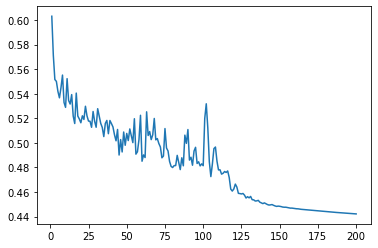

In [69]:
import matplotlib.pyplot as plt
plt.plot(list(range(1, 201)), loss_200)